# **Prepare The Date**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


# **Data visualization**

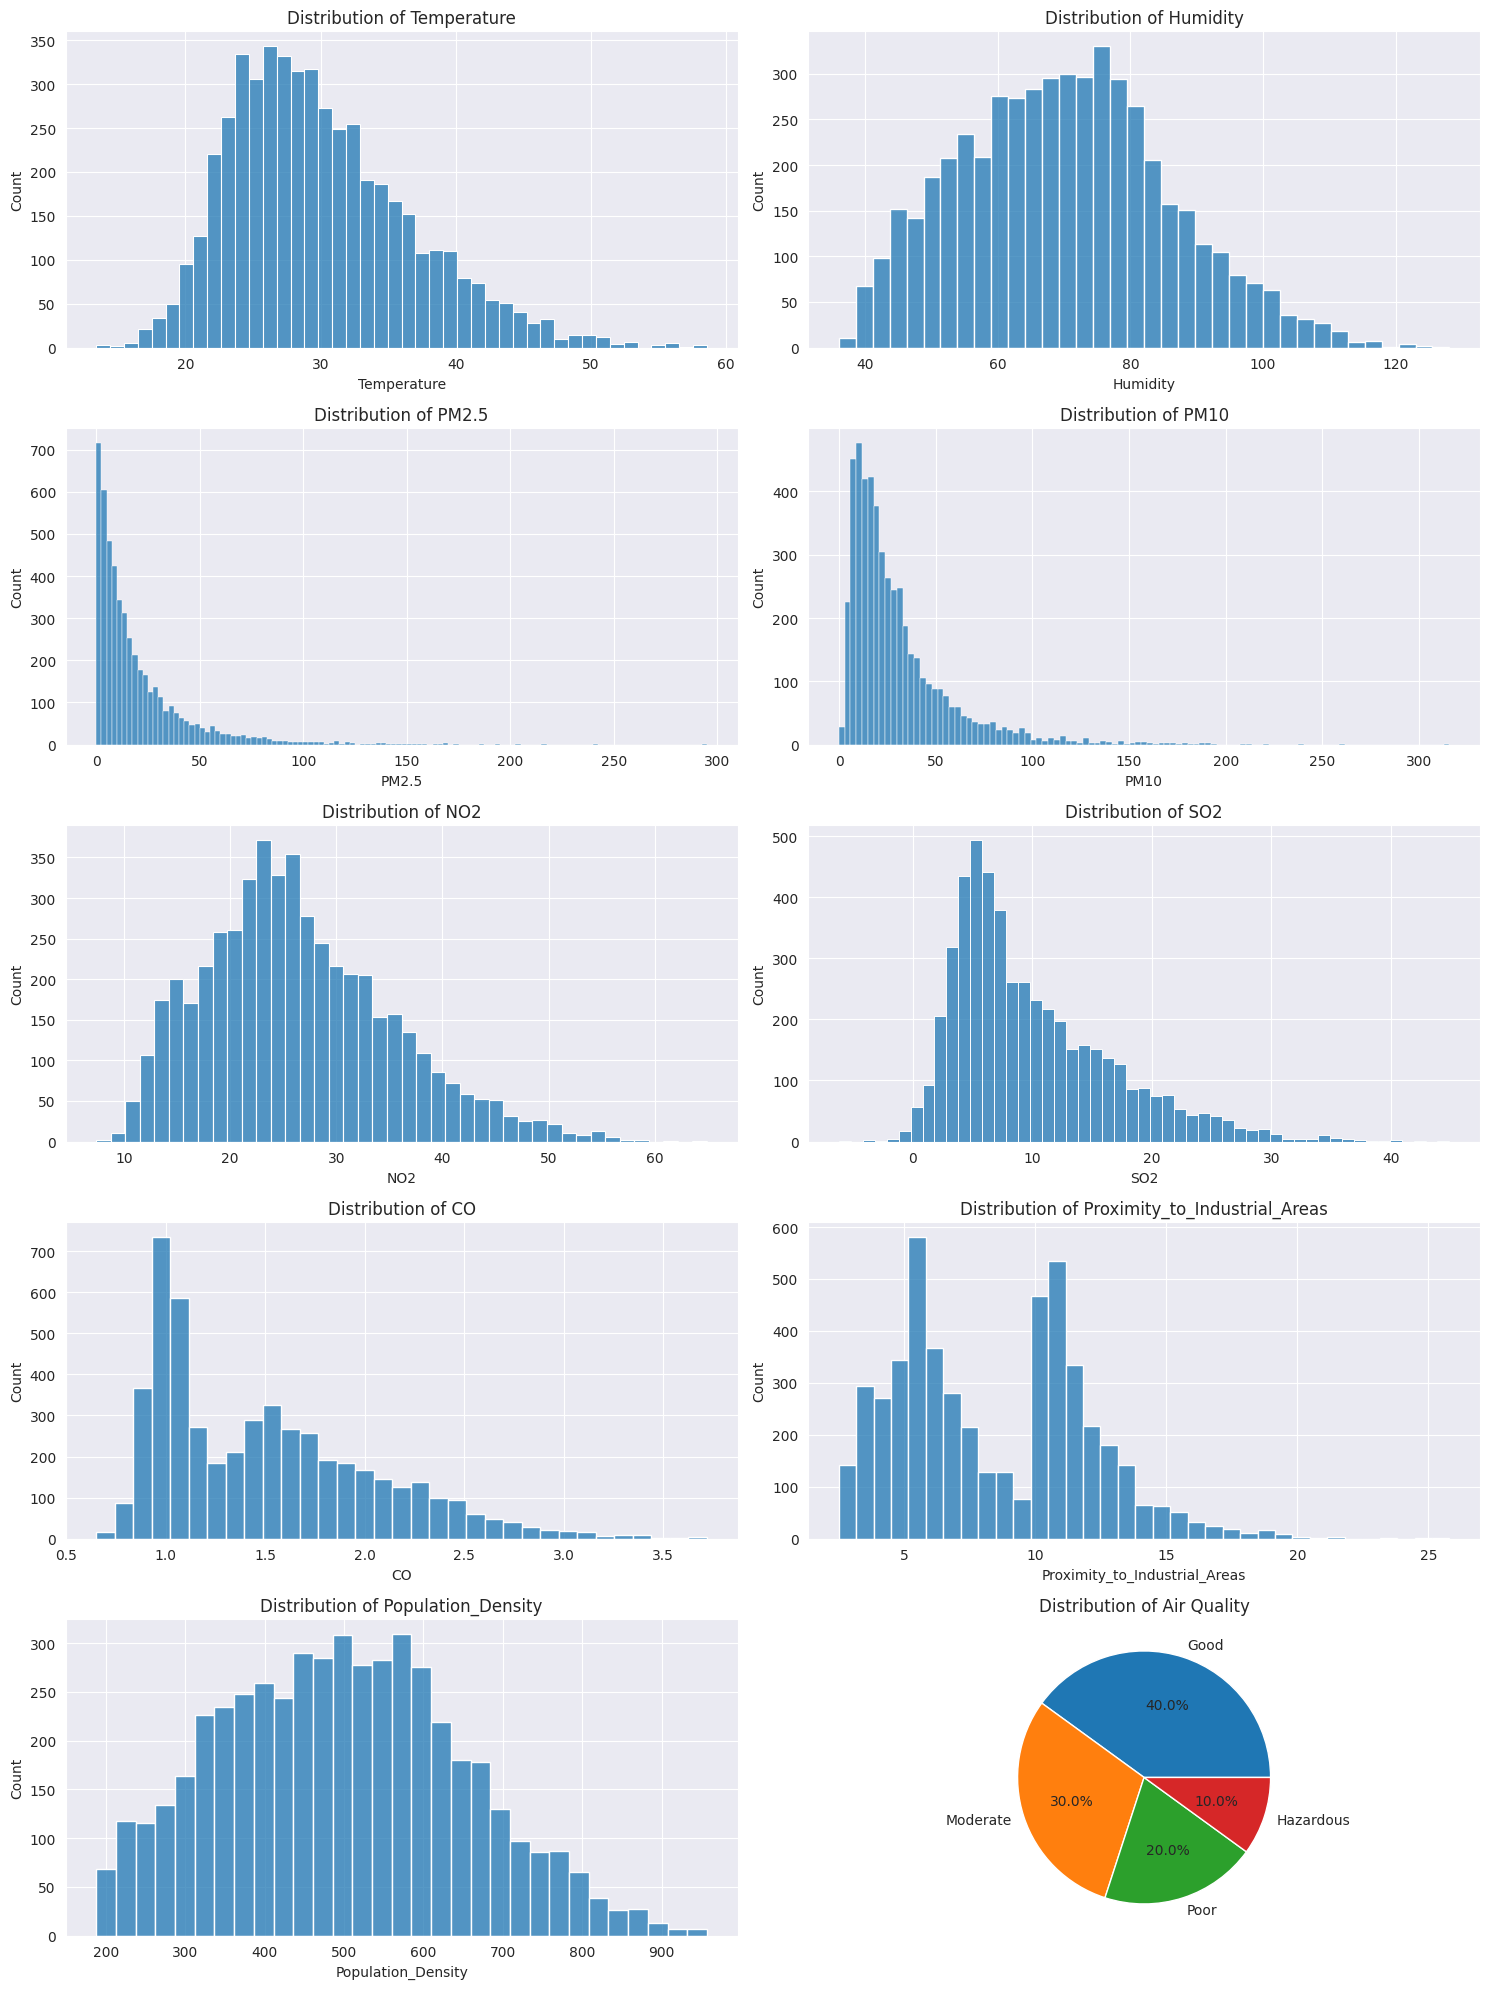

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

axs = axs.flatten()

for i, col in enumerate(df.columns):
  if df[col].dtype == 'object':
    value_counts = df[col].value_counts()
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of {col}')
  else:
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

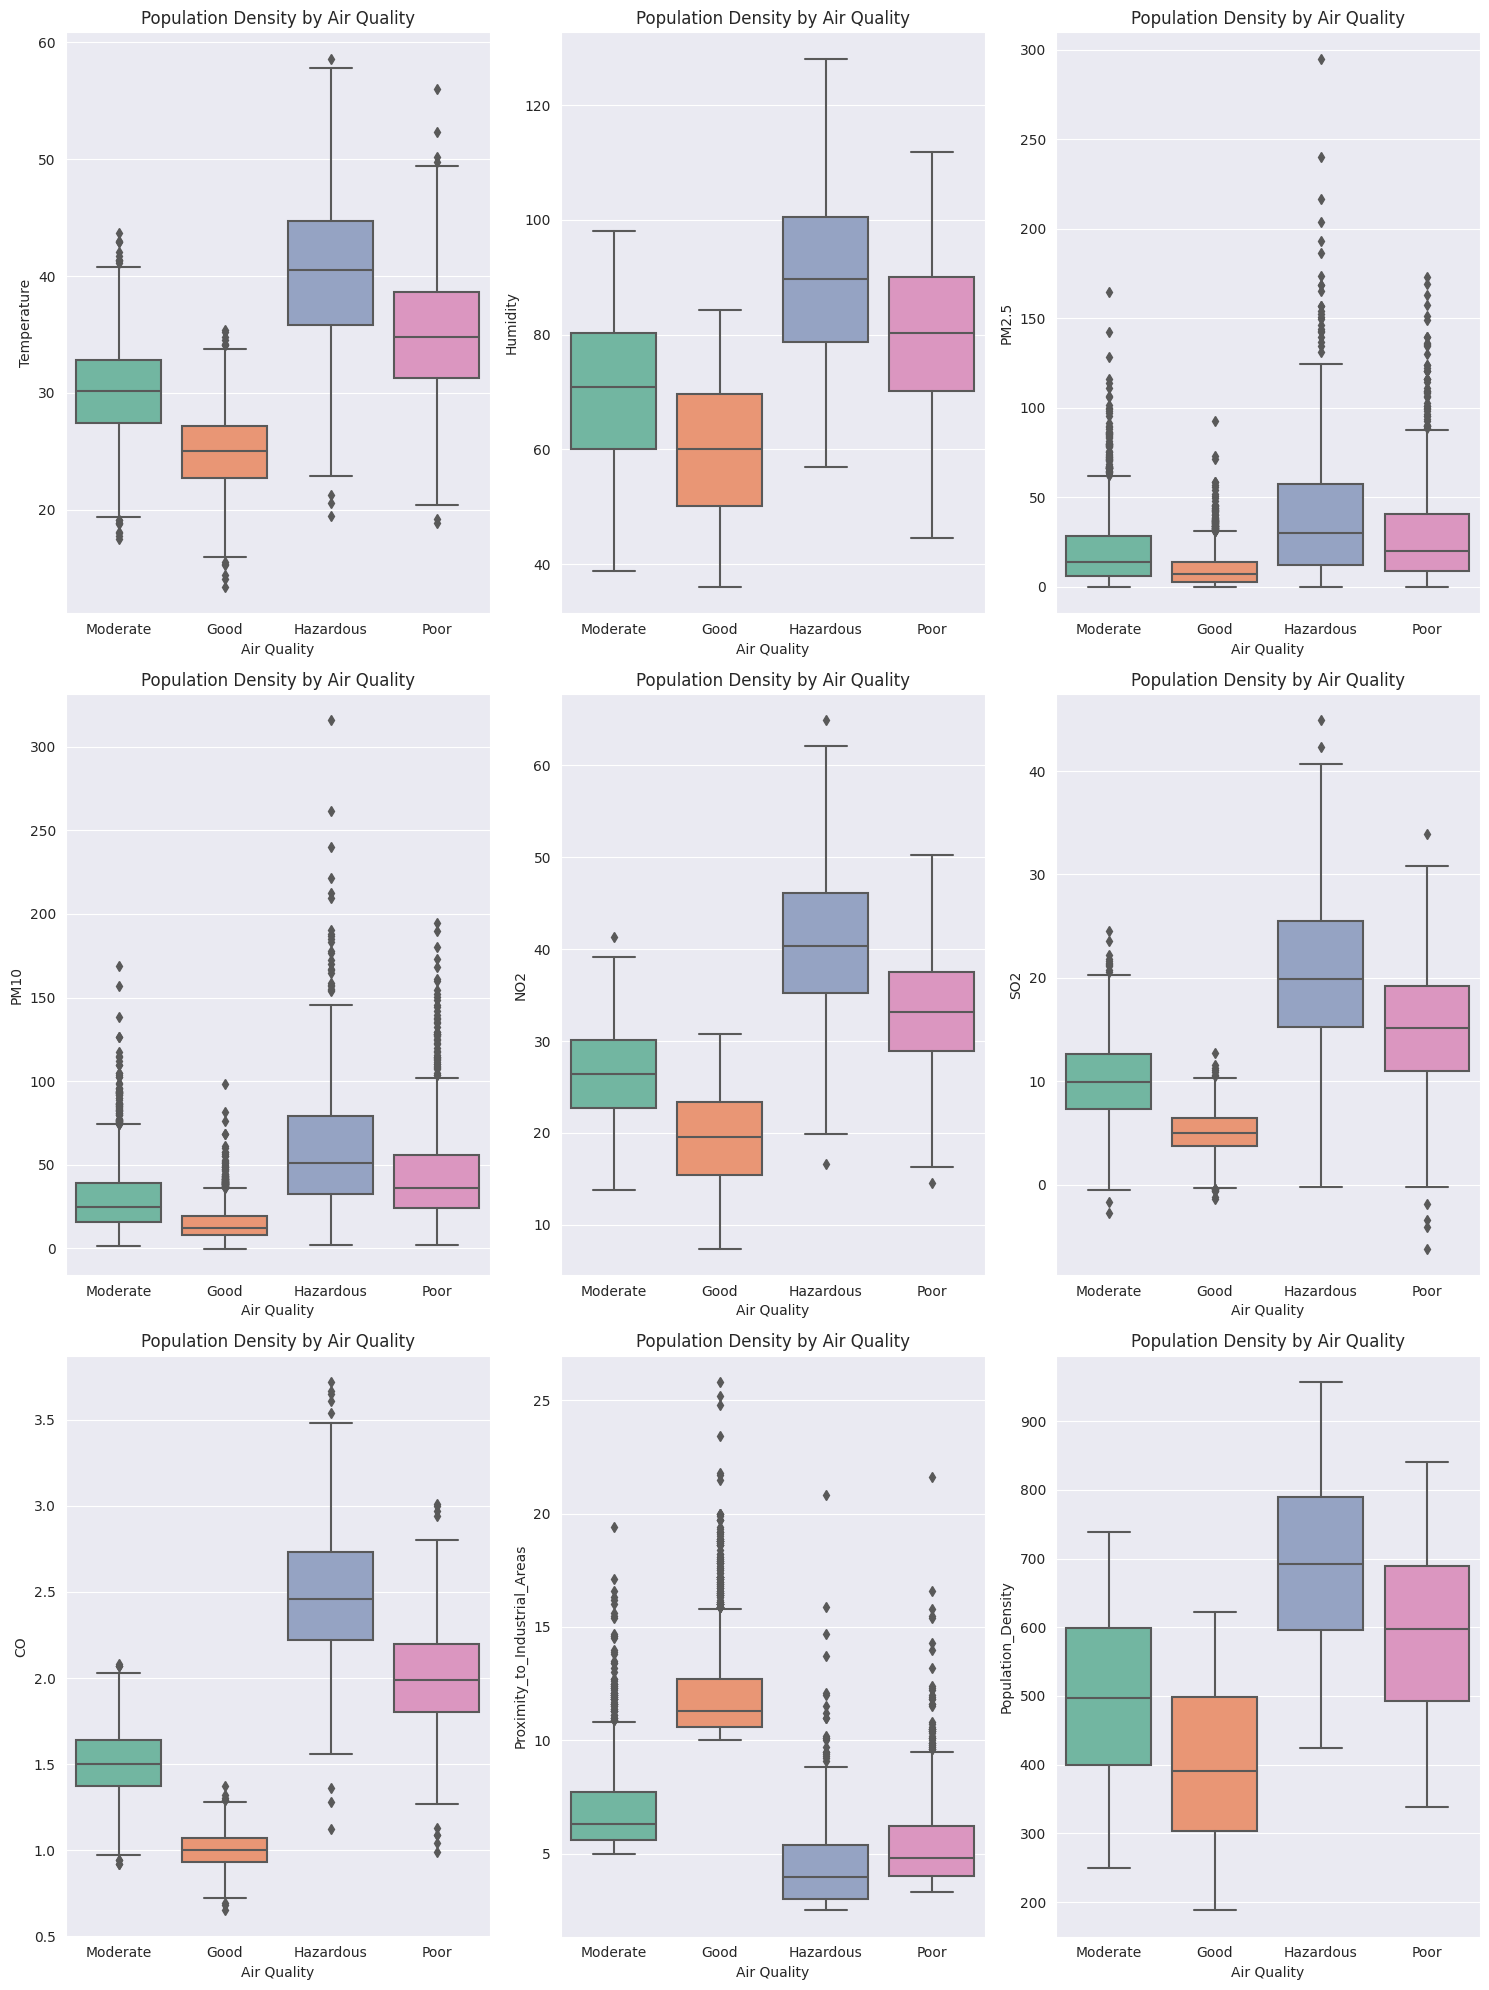

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns.drop('Air Quality')):
    sns.boxplot(x='Air Quality', y=df[col], data=df, ax=axs[i],palette="Set2")
    axs[i].set_title('Population Density by Air Quality')

plt.tight_layout()
plt.show()

In [6]:
le = LabelEncoder()

df['Air Quality'] = le.fit_transform(df['Air Quality'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


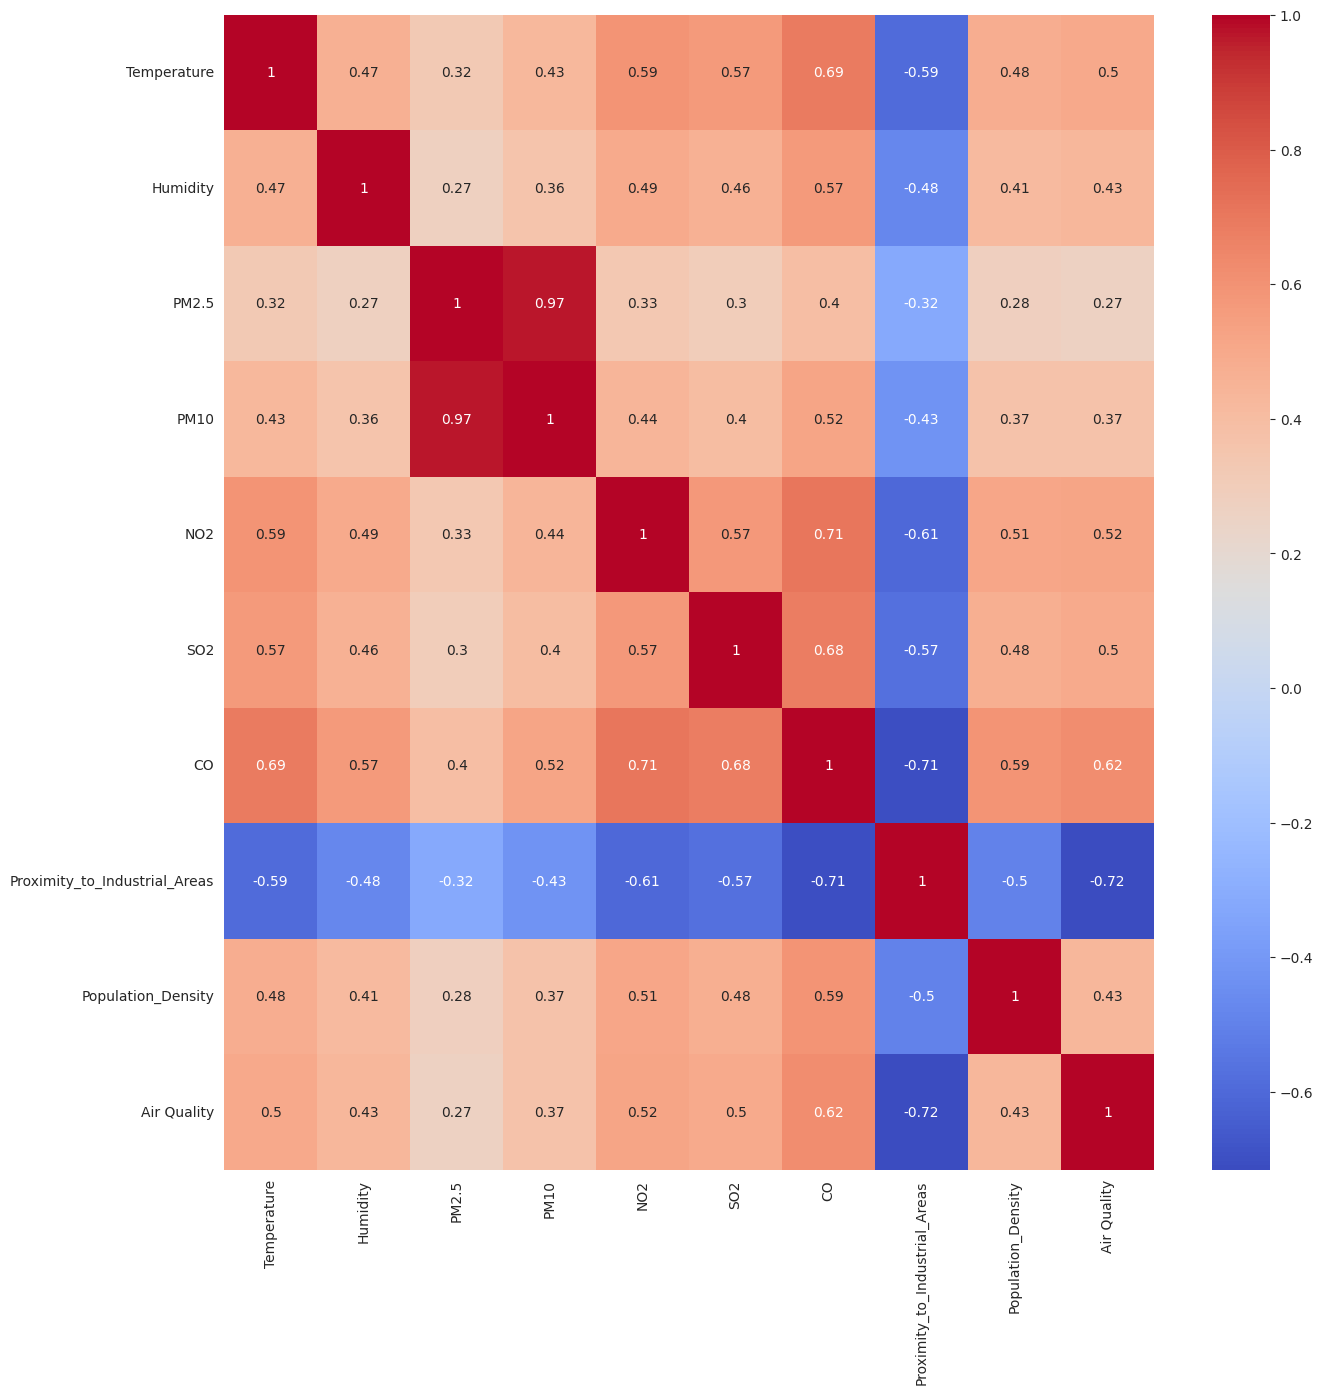

In [7]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm');

# **Split the Data**

In [8]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 9)
(4000,)
(1000, 9)
(1000,)


# **Train The model**

In [9]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3,6,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
 
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
print(f"Test Accuracy: {best_rf.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9580


# Evaluate The Model

In [10]:
y_pred = best_rf.predict(X_test)
print(accuracy_score(y_test, y_pred),"""

""")
print(confusion_matrix(y_test, y_pred),"""

""")
print(classification_report(y_test, y_pred))

0.958 


[[409   0   0   0]
 [  0  94   0  17]
 [  0   0 284  10]
 [  0   5  10 171]] 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.85      0.90       111
           2       0.97      0.97      0.97       294
           3       0.86      0.92      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



# **Feature importances**

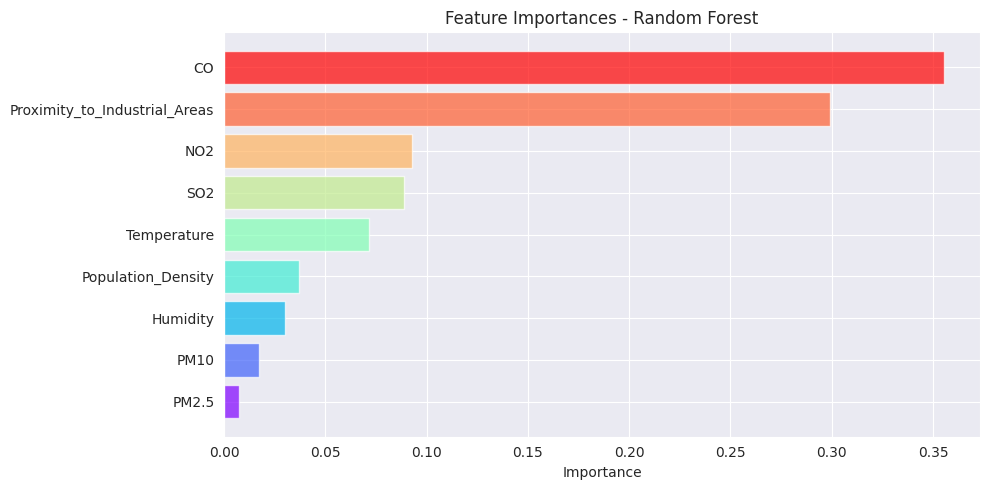

In [11]:
Feature_importances = best_rf.feature_importances_
sorted_indices = np.argsort(Feature_importances)

plt.figure(figsize=(10, 5))
plt.barh(np.array(X.columns)[sorted_indices], Feature_importances[sorted_indices], color=plt.cm.rainbow(np.linspace(0, 1, len(Feature_importances))), alpha=0.7)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()